## Se importan las librerías a utilizar

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                             GradientBoostingRegressor, ExtraTreesRegressor)

from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                    StratifiedKFold)

ruta_actual = os.getcwd()
## Funciones
os.chdir('../')  # Establecemos el directorio de trabajo
from utils import funciones as fn
from utils import listas as ls
os.chdir(ruta_actual)

In [2]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

## Cargamos el csv con los datos ya limpios y analizados en el EDA

In [5]:
ruta_data_raw = f'../data/raw/df_venta_coches.csv'
df = pd.read_csv(ruta_data_raw,index_col=0)
df

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,dealer,Comunidad_Autonoma
0,SEAT,Toledo,950,Diésel,2000.0,227000,111.923077,False,0f4bb8455d27349b8273109b66a847f3,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.000000,True,Autos Raymara,Canarias
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.000000,True,Auto 96,Catalunya
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.000000,True,Inniauto,Navarra
4,FORD,Transit,22850,Diésel,2017.0,107000,130.000000,True,"Autofleet España,s.l",Andalucía
...,...,...,...,...,...,...,...,...,...,...
49732,HYUNDAI,i30,18490,Gasolina,2018.0,47000,140.000000,True,Flexicar Málaga,Andalucía
49733,RENAULT,Laguna,14500,Diésel,2015.0,68750,150.000000,True,Ocasion Plus,Andalucía
49734,PEUGEOT,108,11000,Gasolina,2019.0,21422,72.000000,True,Psa Retail Huelva,Andalucía
49735,AUDI,RS4,47900,Gasolina,2013.0,47900,450.000000,True,Codigocar Lugo,Galicia


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49737 entries, 0 to 49736
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49737 non-null  object 
 1   Modelo                49737 non-null  object 
 2   Precio                49737 non-null  int64  
 3   Combustible           49737 non-null  object 
 4   Anyo                  49737 non-null  float64
 5   Kilometros            49737 non-null  int64  
 6   Potencia              49737 non-null  float64
 7   Vendedor_profesional  49737 non-null  bool   
 8   dealer                49737 non-null  object 
 9   Comunidad_Autonoma    49737 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 3.8+ MB


In [7]:
for i in df.columns:
    print(f'la columna {i} tiene {df[i].nunique()} valores únicos')

la columna Marca tiene 73 valores únicos
la columna Modelo tiene 882 valores únicos
la columna Precio tiene 3342 valores únicos
la columna Combustible tiene 7 valores únicos
la columna Anyo tiene 51 valores únicos
la columna Kilometros tiene 14101 valores únicos
la columna Potencia tiene 844 valores únicos
la columna Vendedor_profesional tiene 2 valores únicos
la columna dealer tiene 12921 valores únicos
la columna Comunidad_Autonoma tiene 19 valores únicos


### La columna ``dealer`` tiene muchos valores únicos por lo que se va a elimminar esa columna

In [8]:
df.drop(columns='dealer',inplace=True)
df

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma
0,SEAT,Toledo,950,Diésel,2000.0,227000,111.923077,False,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.000000,True,Canarias
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.000000,True,Catalunya
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.000000,True,Navarra
4,FORD,Transit,22850,Diésel,2017.0,107000,130.000000,True,Andalucía
...,...,...,...,...,...,...,...,...,...
49732,HYUNDAI,i30,18490,Gasolina,2018.0,47000,140.000000,True,Andalucía
49733,RENAULT,Laguna,14500,Diésel,2015.0,68750,150.000000,True,Andalucía
49734,PEUGEOT,108,11000,Gasolina,2019.0,21422,72.000000,True,Andalucía
49735,AUDI,RS4,47900,Gasolina,2013.0,47900,450.000000,True,Galicia


### Vamos a representar la distribución de la variable Precio

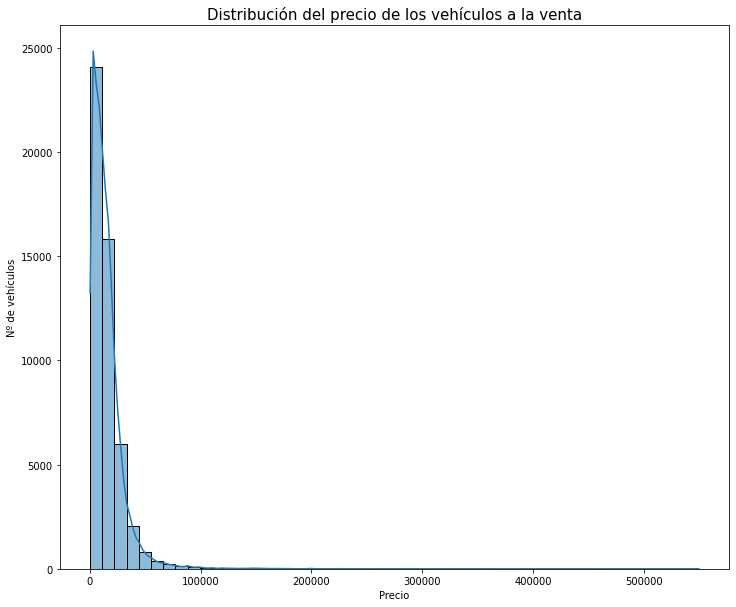

In [9]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución del precio de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Precio')
sns.histplot(data=df, x="Precio", bins=50, kde=True);

No sigue una distribución variable, se eliminan los outliers

In [10]:
fn.outliers(df)

,Precio,Anyo,Kilometros,Potencia
num_outliers,2195.0,284.0,475.0,3836.0
valor_min,-16085.0,1990.5,-165750.0,32.5
valor_max,41475.0,2034.5,377850.0,236.5


In [11]:
filtro_outliers = (
    df.Precio < 41475) & (
        df.Potencia < 236.5) & (
            df.Kilometros < 377850) & (
                df.Anyo > 1990)

### Se quitan los outliers

In [12]:
df = df[filtro_outliers]
df

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma
0,SEAT,Toledo,950,Diésel,2000.0,227000,111.923077,False,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.000000,True,Canarias
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.000000,True,Catalunya
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.000000,True,Navarra
4,FORD,Transit,22850,Diésel,2017.0,107000,130.000000,True,Andalucía
...,...,...,...,...,...,...,...,...,...
49731,SEAT,Leon,18590,Diésel,2019.0,21153,115.000000,True,Comunidad_de_Madrid
49732,HYUNDAI,i30,18490,Gasolina,2018.0,47000,140.000000,True,Andalucía
49733,RENAULT,Laguna,14500,Diésel,2015.0,68750,150.000000,True,Andalucía
49734,PEUGEOT,108,11000,Gasolina,2019.0,21422,72.000000,True,Andalucía


### Tenemos varios valores de Marca con 1 o muy pocas observaciones, se van a quitar esos valores para simplificar el modelo.

In [13]:
df.Marca.value_counts()

VOLKSWAGEN       4303
BMW              3490
PEUGEOT          3263
MERCEDES-BENZ    3078
AUDI             3071
                 ... 
UMM                 1
MAXUS               1
PIAGGIO             1
IVECO-PEGASO        1
LDV                 1
Name: Marca, Length: 63, dtype: int64

In [14]:
df.Marca.value_counts()[df.Marca.value_counts().values <31].index

Index(['ROVER', 'DODGE', 'MAHINDRA', 'GALLOPER', 'TATA', 'DFSK', 'MG', 'ISUZU',
       'PORSCHE', 'SANTANA', 'CADILLAC', 'CUPRA', 'Invicta Electric', 'AUSTIN',
       'PONTIAC', 'DR AUTOMOBILES', 'LOTUS', 'DAIHATSU', 'UMM', 'MAXUS',
       'PIAGGIO', 'IVECO-PEGASO', 'LDV'],
      dtype='object')

In [15]:
for i in df.Marca.value_counts()[df.Marca.value_counts().values <31].index:
    df = df[df.Marca != i]

In [16]:
df

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma
0,SEAT,Toledo,950,Diésel,2000.0,227000,111.923077,False,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.000000,True,Canarias
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.000000,True,Catalunya
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.000000,True,Navarra
4,FORD,Transit,22850,Diésel,2017.0,107000,130.000000,True,Andalucía
...,...,...,...,...,...,...,...,...,...
49731,SEAT,Leon,18590,Diésel,2019.0,21153,115.000000,True,Comunidad_de_Madrid
49732,HYUNDAI,i30,18490,Gasolina,2018.0,47000,140.000000,True,Andalucía
49733,RENAULT,Laguna,14500,Diésel,2015.0,68750,150.000000,True,Andalucía
49734,PEUGEOT,108,11000,Gasolina,2019.0,21422,72.000000,True,Andalucía


### Se hace lo mismo para la variable Modelo

In [17]:
df.Modelo.value_counts()

Golf                1414
Serie 3             1200
A4                   905
Focus                842
A3                   827
                    ... 
Explorer               1
Massif                 1
ë-C4                   1
Land Cruiser 100       1
Clase SL R129          1
Name: Modelo, Length: 701, dtype: int64

In [18]:
df.Modelo.value_counts()[df.Modelo.value_counts().values <20]

C5 Aircross Hybrid    19
CLA                   19
Grand Vitara          19
Navara                19
GT                    19
                      ..
Explorer               1
Massif                 1
ë-C4                   1
Land Cruiser 100       1
Clase SL R129          1
Name: Modelo, Length: 359, dtype: int64

In [19]:
for i in df.Modelo.value_counts()[df.Modelo.value_counts().values <20].index:
    df = df[df.Modelo != i]

In [20]:
df.Modelo.value_counts()

Golf       1414
Serie 3    1200
A4          905
Focus       842
A3          827
           ... 
Bipper       20
Lancer       20
Z3           20
Celica       20
Movano       20
Name: Modelo, Length: 342, dtype: int64

## Para poder incluir la variable Marca en el modelo, vamos a clasificar los valores de esta variable en varias categorias

In [21]:
df['Cluster_Marca']=df.Marca.apply(fn.cluster_marcas)

In [22]:
df.Cluster_Marca.value_counts()

Standard       19585
Premium         9780
Mid_Premium     8181
Low_Cost        4443
Name: Cluster_Marca, dtype: int64

Hacemos lo mismo con la variable Modelo

In [23]:
df['Cluster_Modelo']=df.Modelo.apply(fn.cluster_modelo)
df

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
0,SEAT,Toledo,950,Diésel,2000.0,227000,111.923077,False,Navarra,Standard,sedan_pequeno
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.000000,True,Canarias,Standard,compacto_pequeno
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.000000,True,Catalunya,Standard,otro
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.000000,True,Navarra,Mid_Premium,furgon_pasajero
4,FORD,Transit,22850,Diésel,2017.0,107000,130.000000,True,Andalucía,Standard,furgon_trabajo
...,...,...,...,...,...,...,...,...,...,...,...
49731,SEAT,Leon,18590,Diésel,2019.0,21153,115.000000,True,Comunidad_de_Madrid,Standard,compacto_grande
49732,HYUNDAI,i30,18490,Gasolina,2018.0,47000,140.000000,True,Andalucía,Standard,compacto_grande
49733,RENAULT,Laguna,14500,Diésel,2015.0,68750,150.000000,True,Andalucía,Standard,sedan_grande
49734,PEUGEOT,108,11000,Gasolina,2019.0,21422,72.000000,True,Andalucía,Standard,otro


In [24]:
df.Cluster_Modelo.value_counts()

compacto_pequeno    8231
compacto_grande     7901
otro                6498
sub_grande          5792
sedan_grande        5536
sub_pequeno         3386
sedan_pequeno       2576
furgon_trabajo      1364
furgon_pasajero      319
coupe_pequeno        226
coupe_grande         160
Name: Cluster_Modelo, dtype: int64

### Se eliminan las variables Marca y Modelo que ya no hacen falta

In [25]:
df.drop(columns=['Marca','Modelo'], inplace=True)

### se guarda el dataframe con los datos preparados para emplear en el modelo de regresión

In [27]:
df.to_csv('../data/clean/df_coches_clean.csv')